In [ ]:
"""
Purpose: To test the skeleton cleaning
To eliminate the parts of the skeleton that are spines
"""

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

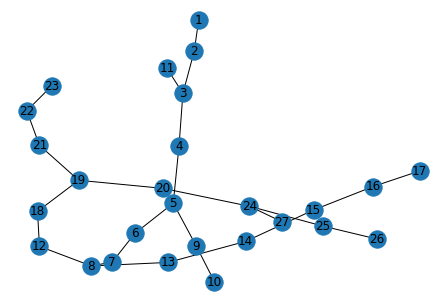

In [2]:
edges = np.array([
    [1,2],
    [2,3],
    [3,11],
    [3,4],
    [4,5],
    [5,9],
    [9,10],
    [5,6],
    [6,7],
    [7,8],
    [8,13],
    [13,14],
    [14,15],
    [15,16],
    [16,17],
    [8,12],
    [12,18],
    [18,19],
    [19,20],
    [20,24],
    [24,27],
    [24,25],
    [25,26],
    [19,21],
    [21,22],
    [22,23]
])

G = nx.from_edgelist(edges)
nx.draw(G,with_labels=True)

In [3]:
"""
Pseudocode
1) Find all end nodes on graph
2) for each end node find the distance to the closest T
3) Start with node with lowest distance"
if below minimum threshold then remove from path and return to step 2
if NOT --> BREAK

"""

'\nPseudocode\n1) Find all end nodes on graph\n2) for each end node find the distance to the closest T\n3) Start with node with lowest distance"\nif below minimum threshold then remove from path and return to step 2\nif NOT --> BREAK\n\n'

In [19]:
def end_node_path_to_junciton(curr_G,end_node):
    curr_node = end_node
    node_list = [curr_node]
    for i in range(len(curr_G)):
        neighbors = list(curr_G[curr_node])
        if len(neighbors) <= 2:
            curr_node = [k for k in neighbors if k not in node_list][0]
            node_list.append(curr_node)
            #print(f"node_list = {node_list}")
        else:
            break
    return node_list
        

In [5]:
def distance_measure(path,G=None):
    return len(path)

In [ ]:
min_distance_to_junction = 3

end_nodes = np.array([k for k,n in dict(G.degree()).items() if n == 1])
end_nodes_dist_to_j = [distance_measure(end_node_path_to_junciton(G,n)) for n in end_nodes]
ordered_end_nodes = end_nodes[np.argsort(end_nodes_dist_to_j)]
ordered_end_nodes
current_end_node = ordered_end_nodes[0]

for i in range(len(end_nodes)):
    current_path_to_junction = end_node_path_to_junciton(G,current_end_node)
    if distance_measure(current_path_to_junction)<min_distance_to_junction:
        #remove the nodes
        G.remove_nodes_from(current_path_to_junction)
        end_nodes = end_nodes[end_nodes != current_end_node]
        end_nodes_dist_to_j = [len(end_node_path_to_junciton(G,n)) for n in end_nodes]
        ordered_end_nodes = end_nodes[np.argsort(end_nodes_dist_to_j)]
        current_end_node = ordered_end_nodes[0]
    else:
        break
return G
        
    


In [ ]:
nx.draw(G,with_labels=True)

In [ ]:
edges = np.array([
    [1,2],
    [2,3],
    [3,11],
    [3,4],
    [4,5],
    [5,9],
    [9,10],
    [5,6],
    [6,7],
    [7,8],
    [8,13],
    [13,14],
    [14,15],
    [15,16],
    [16,17],
    [8,12],
    [12,18],
    [18,19],
    [19,20],
    [20,24],
    [24,27],
    [24,25],
    [25,26],
    [19,21],
    [21,22],
    [22,23]
])

G = nx.from_edgelist(edges)
nx.draw(G,with_labels=True)

Using Distance measure distance_measure_func


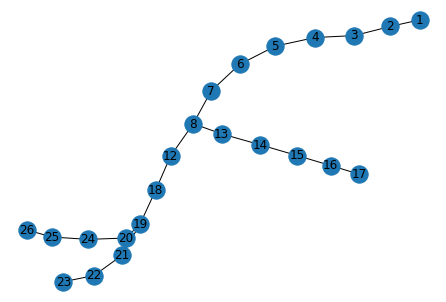

In [22]:
def convert_skeleton_to_graph(staring_edges,
                             stitch_print=False):
    stitch_start = time.time()

    all_skeleton_vertices = staring_edges.reshape(-1,3)
    unique_rows,indices = np.unique(all_skeleton_vertices,return_inverse=True,axis=0)
    edges_with_coefficients = indices.reshape(-1,2)

    if stitch_print:
        print(f"Getting the unique rows and indices= {time.time()-stitch_start}")
    stitch_start = time.time()

    #create the graph from the edges
    B = nx.Graph()
    B.add_nodes_from([(x,{"coordinates":y}) for x,y in enumerate(unique_rows)])
    B.add_edges_from(edges_with_coefficients)

    if stitch_print:
        print(f"Putting edges into networkx graph= {time.time()-stitch_start}")
    stitch_start = time.time()

    # find the shortest distance between the two different subgraphs:
    from scipy.spatial import distance_matrix

    UG = B.to_undirected()

    if stitch_print:
        print(f"Making undirected graph= {time.time()-stitch_start}")
    stitch_start = time.time()
    
    return UG



def get_skeleton_from_graph(UG):
    UG = nx.convert_node_labels_to_integers(UG)
    total_coord = nx.get_node_attributes(UG,'coordinates')
    current_coordinates = np.array(list(total_coord.values()))
    
    try:
        total_edges_stitched = current_coordinates[np.array(list(UG.edges())).reshape(-1,2)]
    except:
        print("getting the total edges stitched didn't work")
        print(f"current_coordinates = {current_coordinates}")
        print(f"UG.edges() = {list(UG.edges())} with type = {type(list(UG.edges()))}")
        print(f"np.array(UG.edges()) = {np.array(list(UG.edges()))}")
        print(f"np.array(UG.edges()).reshape(-1,2) = {np.array(list(UG.edges())).reshape(-1,2)}")
        
        raise Exception(" total_edges_stitched not calculated")
        
    return total_edges_stitched

def list_len_measure(curr_list,G):
    return len(curr_list)

def skeletal_distance(curr_list,G):
    coordinates_dict = nx.get_node_attributes(G,'coordinates')
    coor = [coordinates_dict[k] for k in curr_list]
    norm_values =  [np.linalg.norm(coor[i] - coor[i-1]) for i in range(1,len(coor))]
    #print(f"norm_values = {norm_values}")
    return np.sum(norm_values)
    
def clean_skeleton(G,
                   distance_func,
                  min_distance_to_junction = 3,
                  return_skeleton=True,
                  print_flag=False):
    """
    Example of how to use: 
    
        
    def distance_measure(path,G=None):
        return len(path)
    new_G = clean_skeleton(G,distance_measure)
    nx.draw(new_G,with_labels=True)
    """
    
    
    def end_node_path_to_junciton(curr_G,end_node):
        curr_node = end_node
        node_list = [curr_node]
        for i in range(len(curr_G)):
            neighbors = list(curr_G[curr_node])
            if len(neighbors) <= 2:
                curr_node = [k for k in neighbors if k not in node_list][0]
                node_list.append(curr_node)
                #print(f"node_list = {node_list}")
            else:
                break
        return node_list

    print(f"Using Distance measure {distance_func.__name__}")
    
    if type(G) != type(nx.Graph()):
        G = convert_skeleton_to_graph(G)
    
    end_nodes = np.array([k for k,n in dict(G.degree()).items() if n == 1])
    end_nodes_dist_to_j = [distance_func(end_node_path_to_junciton(G,n),G) for n in end_nodes]
    ordered_end_nodes = end_nodes[np.argsort(end_nodes_dist_to_j)]
    if print_flag:
        print(f"total end_nodes = {end_nodes}")
    current_end_node = ordered_end_nodes[0]
    paths_removed = 0
    
    for i in range(len(end_nodes)):
        current_path_to_junction = end_node_path_to_junciton(G,current_end_node)
        if print_flag:
            print(f"ordered_end_nodes = {ordered_end_nodes}")
            print(f"\n\ncurrent_end_node = {current_end_node}")
            print(f"current_path_to_junction = {current_path_to_junction}")
            #print(f"Using Distance measure {distance_func.__name__}")
        if distance_func(current_path_to_junction,G) <min_distance_to_junction:
            if print_flag:
                print(f"the current distance that was below was {distance_func(current_path_to_junction,G)}")
            #remove the nodes
            G.remove_nodes_from(current_path_to_junction[:-1])
            end_nodes = end_nodes[end_nodes != current_end_node]
            end_nodes_dist_to_j = [distance_func(end_node_path_to_junciton(G,n),G) for n in end_nodes]
            ordered_end_nodes = end_nodes[np.argsort(end_nodes_dist_to_j)]
            if print_flag:
                print(f"   insdie if statement ordered_end_nodes = {ordered_end_nodes}")
                
            current_end_node = ordered_end_nodes[0]
            paths_removed += 1
        else:
            break
    if print_flag:
        print(f"Done cleaning networkx graph with {paths_removed} paths removed")
    if return_skeleton:
        return get_skeleton_from_graph(G)
    else:
        return G
    
def distance_measure_func(path,G=None):
    #print("new thing")
    return len(path)

new_G = clean_skeleton(G,distance_measure_func,return_skeleton=False)
nx.draw(new_G,with_labels=True)

In [ ]:
nx.convert_node_labels_to_integers(new_G).nodes()

# cleaning an actual skeleton

In [9]:
import skeleton_utils as sk
from importlib import reload
sk = reload(sk)

In [10]:
len("skeleton.cgal")

13

In [12]:
from pathlib import Path
test_skeleton = Path("./Dustin_vp6/Dustin_soma_0_branch_0_0_skeleton.cgal")
if not test_skeleton.exists():
    print(str(test_skeleton)[:-14])
    file_of_skeleton = sk.calcification(str(test_skeleton.absolute())[:-14])
else:
    file_of_skeleton = test_skeleton

In [14]:
# import the skeleton
test_sk = sk.read_skeleton_edges_coordinates(test_skeleton)
import trimesh
test_mesh = trimesh.load_mesh(str(str(test_skeleton.absolute())[:-14] + ".off"))
sk.graph_skeleton_and_mesh(test_mesh.vertices,
                          test_mesh.faces,
                          edge_coordinates=test_sk)

only one skeleton so no stacking needed


/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [28]:
# clean the skeleton and then visualize
import time
clean_time = time.time()
cleaned_skeleton = clean_skeleton(test_sk,
                    distance_func=skeletal_distance,
              min_distance_to_junction=10000,
              return_skeleton=True,
              print_flag=True)
print(f"Total time for skeleton clean {time.time() - clean_time}")

Using Distance measure skeletal_distance
total end_nodes = [  0  30  58 153 239 242 250 301 306 320 497 499 531 548 604]
ordered_end_nodes = [242 301 320 250 306 548 499  58 497 531   0 153 604 239  30]


current_end_node = 242
current_path_to_junction = [242, 238]
the current distance that was below was 362.9283675878754
   insdie if statement ordered_end_nodes = [301 320 250 306 548 499  58 497 531   0 153 604 239  30]
ordered_end_nodes = [301 320 250 306 548 499  58 497 531   0 153 604 239  30]


current_end_node = 301
current_path_to_junction = [301, 302]
the current distance that was below was 580.8614292583043
   insdie if statement ordered_end_nodes = [320 306 548 499 250  58 497 531   0 153 604 239  30]
ordered_end_nodes = [320 306 548 499 250  58 497 531   0 153 604 239  30]


current_end_node = 320
current_path_to_junction = [320, 316, 309]
the current distance that was below was 1625.240564026802
   insdie if statement ordered_end_nodes = [306 548 499 250  58 497 531   0 153

In [29]:
# see what skeleton looks like now
test_mesh = trimesh.load_mesh(str(str(test_skeleton.absolute())[:-14] + ".off"))
sk.graph_skeleton_and_mesh(test_mesh.vertices,
                          test_mesh.faces,
                          edge_coordinates=cleaned_skeleton)

# Creating a distance measure for the filtering

In [ ]:
 # clean the skeleton and then visualize
import time
clean_time = time.time()
cleaned_graph = clean_skeleton(test_sk,
              min_distance_to_junction=5,
              return_skeleton=False,
              print_flag=False)
print(f"Total time for skeleton clean {time.time() - clean_time}")

In [ ]:
cleaned_graph
coordinates_dict = nx.get_node_attributes(cleaned_graph,'coordinates')
example_path = [1,3,5]
coor = [coordinates_dict[k] for k in example_path]
np.sum([np.linalg.norm(coor[i] - coor[i-1]) for i in range(1,len(coor))])
    